# Installing Tensorflow

In [1]:
!python --version

Python 3.8.8


In [2]:
# pip install tensorflow  # sadece bu yeter

In [3]:
# pip install tensorflow==2.0

In [4]:
# pip install --ignore-installed --upgrade tensorflow==2.0

In [5]:
import tensorflow as tf
tf.__version__

'2.6.0'

# Keras Syntax Basics

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [9]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [10]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


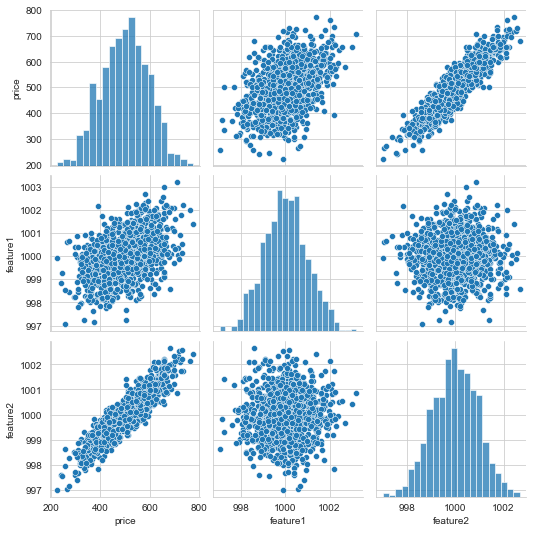

In [13]:
sns.pairplot(df);

In [14]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [17]:
# X.info()

In [18]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [19]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
X_train.shape

(700, 2)

In [22]:
X_test.shape

(300, 2)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train.max()

1.0

In [28]:
X_train.min()

0.0

In [29]:
X_test.max()

1.0186515935232023

In [30]:
X_test.min()

-0.014108392024525074

## Modelling

In [31]:
import tensorflow as tf

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [33]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evaluation method (since it isn't yet buil

In [34]:
help(Dense)

Help on class Dense in module keras.layers.core:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-t

In [35]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [36]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1] or input_shape = X_train.shape
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [37]:
X_train.shape[1]

2

In [38]:
model.compile(optimizer = "rmsprop", loss = "mse")  # "rmsprop" yerine daha çok "adam" denenir.

In [39]:
tf.keras.optimizers

<module 'keras.api._v2.keras.optimizers' from 'C:\\Users\\ContraVolta\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\optimizers\\__init__.py'>

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [40]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256551.1094
Epoch 2/250
22/22 [==============================] - 0s 9ms/step - loss: 256418.2812
Epoch 3/250
22/22 [==============================] - 0s 6ms/step - loss: 256287.5156
Epoch 4/250
22/22 [==============================] - 0s 6ms/step - loss: 256151.7656
Epoch 5/250
22/22 [==============================] - 0s 4ms/step - loss: 256012.5312
Epoch 6/250
22/22 [==============================] - 0s 5ms/step - loss: 255867.4219
Epoch 7/250
22/22 [==============================] - 0s 7ms/step - loss: 255712.0625
Epoch 8/250
22/22 [==============================] - 0s 6ms/step - loss: 255543.1094
Epoch 9/250
22/22 [==============================] - 0s 5ms/step - loss: 255360.2969
Epoch 10/250
22/22 [==============================] - 0s 4ms/step - loss: 255162.9531
Epoch 11/250
22/22 [==============================] - 0s 4ms/step - loss: 254948.6562
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

22/22 [==============================] - 0s 2ms/step - loss: 89073.7734
Epoch 96/250
22/22 [==============================] - 0s 4ms/step - loss: 85051.6406
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 81053.6172
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 77034.8594
Epoch 99/250
22/22 [==============================] - 0s 3ms/step - loss: 73048.9453
Epoch 100/250
22/22 [==============================] - 0s 4ms/step - loss: 69088.4375
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 65140.8633
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 61230.6758
Epoch 103/250
22/22 [==============================] - 0s 4ms/step - loss: 57348.2930
Epoch 104/250
22/22 [==============================] - 0s 5ms/step - loss: 53526.8359
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 49761.6953
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - los

22/22 [==============================] - 0s 2ms/step - loss: 805.4105
Epoch 191/250
22/22 [==============================] - 0s 2ms/step - loss: 791.4509
Epoch 192/250
22/22 [==============================] - 0s 2ms/step - loss: 774.8166
Epoch 193/250
22/22 [==============================] - 0s 2ms/step - loss: 760.4015
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 744.3923
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 729.8437
Epoch 196/250
22/22 [==============================] - 0s 5ms/step - loss: 713.5237
Epoch 197/250
22/22 [==============================] - 0s 5ms/step - loss: 700.0696
Epoch 198/250
22/22 [==============================] - 0s 4ms/step - loss: 685.1763
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 670.3010
Epoch 200/250
22/22 [==============================] - 0s 3ms/step - loss: 656.4644
Epoch 201/250
22/22 [==============================] - 0s 6ms/step - loss: 639.7780
Epoch 

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.weights  # the last weight and bias values of my model. 8-->weights, 4--> bias / 16,4 / 16,4 / 4,4 ...

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.5247519 ,  2.6788697 , -0.27241755, -0.02613335],
        [-0.43200898,  5.3471107 , -0.9050572 ,  0.13368988]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        ,  1.3878973 ,  0.        , -0.12656116], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.01215589, -0.0210796 ,  0.30999833,  0.6229734 ],
        [-0.74434173, -0.44233304, -0.7685226 ,  3.5674798 ],
        [-0.12912756,  0.03840977,  0.17159683,  0.25618428],
        [ 0.66649693, -0.13131207, -0.5762496 , -0.5230313 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.       , 0.       , 0.       , 1.3706602], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 1.24688685e-01, -1.76699936e-01, -2.86769271e-02,
         -5.90801239e-01],
        [ 4.275

In [43]:
model.history.history  # Returns the value as the number of epochs.

{'loss': [256551.109375,
  256418.28125,
  256287.515625,
  256151.765625,
  256012.53125,
  255867.421875,
  255712.0625,
  255543.109375,
  255360.296875,
  255162.953125,
  254948.65625,
  254719.421875,
  254472.25,
  254206.609375,
  253921.6875,
  253617.140625,
  253291.203125,
  252944.203125,
  252572.84375,
  252180.59375,
  251758.671875,
  251315.109375,
  250843.421875,
  250343.015625,
  249816.0625,
  249255.015625,
  248663.90625,
  248043.890625,
  247387.859375,
  246697.390625,
  245974.078125,
  245211.0625,
  244408.203125,
  243570.671875,
  242693.625,
  241773.59375,
  240813.25,
  239810.359375,
  238760.109375,
  237661.84375,
  236520.4375,
  235334.625,
  234093.640625,
  232804.65625,
  231465.09375,
  230067.40625,
  228620.640625,
  227123.765625,
  225565.53125,
  223953.4375,
  222277.421875,
  220554.40625,
  218772.28125,
  216932.828125,
  215023.25,
  213058.921875,
  211021.765625,
  208930.953125,
  206776.359375,
  204562.53125,
  202273.1875,
  

In [44]:
pd.DataFrame(model.history.history)

,loss
0,256551.109
1,256418.281
2,256287.516
3,256151.766
4,256012.531
...,...
245,140.275
246,133.115
247,127.085
248,120.176


<AxesSubplot:>

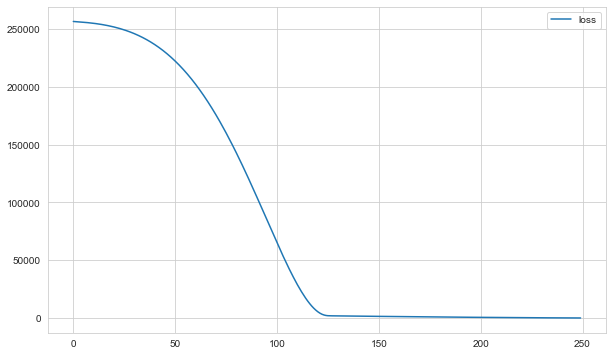

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

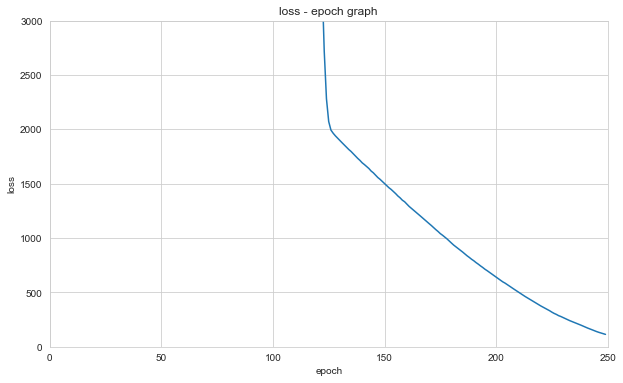

In [46]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [48]:
model.evaluate(X_train, y_train, verbose=0)  # the last loss value after model created

111.4315414428711

In [49]:
model.evaluate(X_test, y_test, verbose=0)  # it became overfit, because of i used 'adam' instead of 'rmsprop'

107.19017028808594

In [50]:
y_pred = model.predict(X_test)

In [51]:
explained_variance_score(y_test, y_pred)

0.9878463108586578

In [52]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
217,599.924,592.414
206,337.951,358.213
159,403.063,406.583
17,657.719,643.729
136,415.443,422.919
138,469.803,470.599
296,502.909,512.511
194,361.426,371.733
11,547.732,545.760
222,447.053,452.264


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

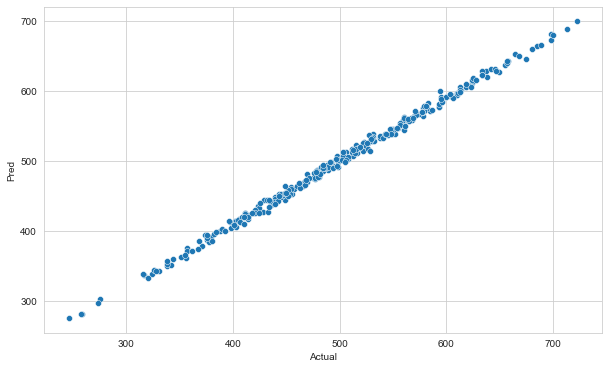

In [53]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [54]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [55]:
eval_metric(y_test, y_pred)

r2_score: 0.9878082572935245 
mae: 8.306318687851993 
mse: 107.19018793189724 
rmse: 10.35326943201505


## Final Model and Model Deployment

In [56]:
scaler = MinMaxScaler().fit(X)

In [57]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [58]:
X_scaled = scaler.transform(X)

In [59]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 257859.6562
Epoch 2/250
32/32 [==============================] - 0s 5ms/step - loss: 257625.8281
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 257430.4844
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 257294.9219
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 257220.5938
Epoch 6/250
32/32 [==============================] - 0s 5ms/step - loss: 257156.5469
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 257083.0156
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 256993.0938
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 256857.9219
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 256669.9062: 0s - loss: 255407.39
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 256453.8906
Epoch 12/250
32/32 [=====================

32/32 [==============================] - 0s 2ms/step - loss: 635.0796
Epoch 97/250
32/32 [==============================] - 0s 2ms/step - loss: 605.4564
Epoch 98/250
32/32 [==============================] - 0s 2ms/step - loss: 577.6593
Epoch 99/250
32/32 [==============================] - 0s 3ms/step - loss: 550.0222
Epoch 100/250
32/32 [==============================] - 0s 2ms/step - loss: 525.5034
Epoch 101/250
32/32 [==============================] - 0s 2ms/step - loss: 499.3938
Epoch 102/250
32/32 [==============================] - 0s 2ms/step - loss: 475.0172
Epoch 103/250
32/32 [==============================] - 0s 2ms/step - loss: 448.6987
Epoch 104/250
32/32 [==============================] - 0s 2ms/step - loss: 422.7890
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 401.1533
Epoch 106/250
32/32 [==============================] - 0s 2ms/step - loss: 379.9968
Epoch 107/250
32/32 [==============================] - 0s 2ms/step - loss: 359.4344
Epoch 108

Epoch 194/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5245
Epoch 195/250
32/32 [==============================] - 0s 1ms/step - loss: 24.8207
Epoch 196/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5281
Epoch 197/250
32/32 [==============================] - 0s 1ms/step - loss: 24.9650
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4265
Epoch 199/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6840
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5918
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7663
Epoch 202/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6502
Epoch 203/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5008
Epoch 204/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5268
Epoch 205/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7033
Epoc

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [60]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'  h5-->bias ve loss değerleri DL'de daha iyi kaydeder.

## Prediction-1

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model_fake_reg = load_model('model_fake_reg.h5')

In [63]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [64]:
sample = [[998, 1000]]

In [65]:
sample_scaled = scaler_fake_reg.transform(sample)

In [66]:
model_fake_reg.predict(sample_scaled)

array([[419.55753]], dtype=float32)

## Prediction-2

In [67]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [68]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [69]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [70]:
model_fake_reg.predict(sample_scaled)

array([[379.44193],
       [331.06607],
       [282.69025],
       [234.31439],
       [185.93861]], dtype=float32)

<div style='background : yellow'><br>
<center><span style='color : red; font-size:4em' ><b>BONUS</b></span></center>
</div>


https://playground.tensorflow.org/#activation=relu&batchSize=20&dataset=circle&regDataset=[…]se&problem=classification&initZero=false&hideText=false
